In [ ]:
# PART A: UNSUPERVISED LEARNING 
##    a)	Given the iris dataset, if we knew that there were k types of iris, but did not have access to a taxonomist to label them: we could try a clustering task:
###        split the observations into well-separated group called clusters.
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


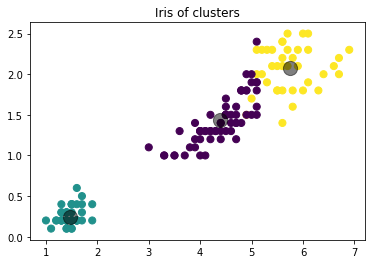

In [35]:
# K-means Clustering
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# load the iris datasets
dataset = load_iris()

# The init parameter represents the method of initialization to select the initial centers of clusters. 
# Instead of selecting them randomly, we use k-means++ to select these centers in a smarter way. 
# This ensures that the algorithm converges quickly. The n_clusters parameter refers to the number of clusters. 
# The n_init parameter refers to the number of times the algorithm should run before deciding upon the best outcome:

# fit a Kmeans model to the data
model = KMeans(init='k-means++',n_clusters=3, n_init=10)
model.fit(dataset.data)
print(model)

# Visualize the results

X = dataset.data
y_kmeans = model.predict(X)
X_df = pd.DataFrame(X)

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_

plt.title('Iris of clusters')
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.49745518901737446
For n_clusters=5, The Silhouette Coefficient is 0.4887488870931048
For n_clusters=6, The Silhouette Coefficient is 0.35876521549077595
For n_clusters=7, The Silhouette Coefficient is 0.3566882476581684
For n_clusters=8, The Silhouette Coefficient is 0.3390450925992608
For n_clusters=9, The Silhouette Coefficient is 0.33233506752740727
For n_clusters=10, The Silhouette Coefficient is 0.3292621347496593


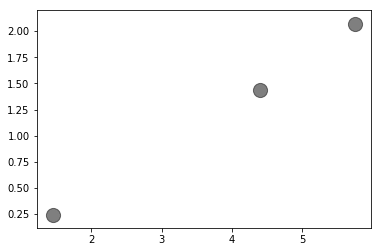

In [36]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = load_iris().data
score = []
values = np.arange(2, 11)

for n_cluster in values:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(
            n_cluster, sil_coeff))
    score.append(sil_coeff)

plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

Text(0.5, 1.0, 'Silhouette score vs number of clusters')

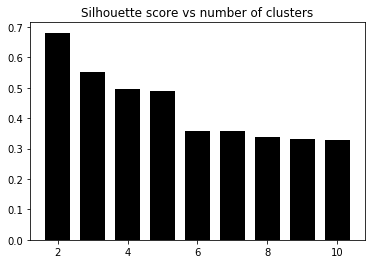

In [37]:
# Visualize the silhouette scores for various values:
# Plot silhouette scores

plt.figure()
plt.bar(values, score, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

<h2><Center>Trying different value of K</Center></h2>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


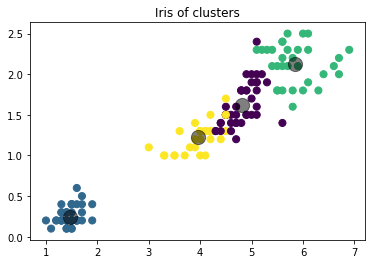

In [38]:
# fit a Kmeans model to the data
model = KMeans(init='k-means++',n_clusters=4, n_init=10)
model.fit(dataset.data)
print(model)

# Visualize the results

X = dataset.data
y_kmeans = model.predict(X)

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_

plt.title('Iris of clusters')
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


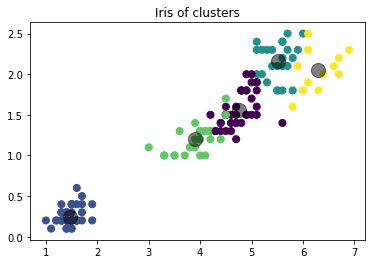

In [39]:
# fit a Kmeans model to the data
model = KMeans(init='k-means++',n_clusters=5, n_init=10)
model.fit(dataset.data)
print(model)

# Visualize the results

X = dataset.data
y_kmeans = model.predict(X)

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_

plt.title('Iris of clusters')
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


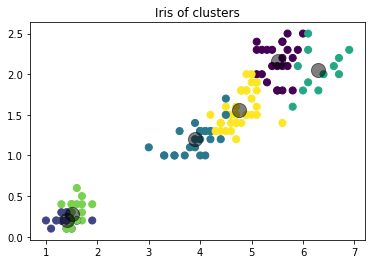

In [40]:
# fit a Kmeans model to the data
model = KMeans(init='k-means++',n_clusters=6, n_init=10)
model.fit(dataset.data)
print(model)

# Visualize the results

X = dataset.data
y_kmeans = model.predict(X)

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_

plt.title('Iris of clusters')
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


<h1><center>Means Shift</center><h1>
<h2>Estimate the bandwidth of the input data. Bandwidth is a parameter of the underlying
kernel density estimation process used in Mean Shift algorithm. The bandwidth affects the
overall convergence rate of the algorithm and the number of clusters that we will end up
with in the end. Hence this is a crucial parameter. If the bandwidth is small, it might results
in too many clusters, where as if the value is large, then it will merge distinct clusters.</h2>

In [41]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
import numpy as np

# The quantile parameter impacts how the bandwidth is estimated. 
# A higher value for quantile will increase the estimated bandwidth, 
# resulting in a lesser number of clusters:

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.18, n_samples=len(X))

# Let's train the Mean Shift clustering model using the estimated bandwidth:
# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of all the clusters:
# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Extract the number of clusters:
# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Centers of clusters:
 [[6.11875    2.85833333 4.66875    1.55208333]
 [4.98888889 3.41111111 1.48       0.24666667]
 [6.63333333 3.06666667 5.54814815 2.1       ]]

Number of clusters in input data = 3


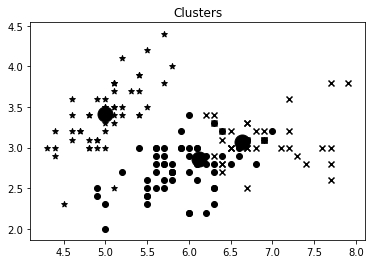

In [43]:
# Visualize the data points:
# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker,color='black')
    # Plot the center of the current cluster:
    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='black', markeredgecolor='black',
            markersize=15)

plt.title('Clusters')
plt.show()

<h2><Center>Elbow method</Center></h2>

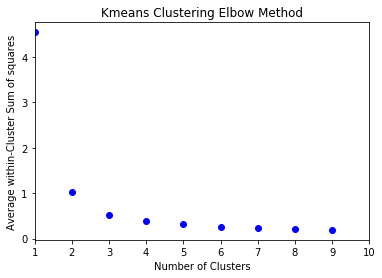

In [48]:
A = []
B = []

for i in range (1 , 10):
    # fit a Kmeans model to the data
    model = KMeans(init='k-means++',n_clusters=i, n_init=10)
    model.fit(X_df)
    
    # Append number of cluster to A data list
    A.append(i)
    
    # Append average within cluster sum of squares to B data List
    SSE = model.inertia_/ X_df.shape[0]
    B.append(SSE)

# plot A & B
plt.plot(A,B,'bo')
plt.xlim((1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('Average within-Cluster Sum of squares')
plt.title('Kmeans Clustering Elbow Method')

# Display the plot
plt.show()
    